In [ ]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# matplotlib


# Question 1
a) sample 1000 data points (x) from a uniform distribution over (1,10) and plot $$y=5x+2$$

In [ ]:
x = np.random.normal(1,10, 1000)
y = 5*x+2

plt.scatter(x,y)

b) sample an additive noise (n) for each data point from $$\mathcal{N}\left(0,\sigma^2\right)$$ where $$\sigma^2=1$$ show the scatter plot $$y'=5\left(x+n\right)+2$$ against the plot of the previously defined y

In [4]:
def noise_gen(data, var):
    return data + np.random.normal(0,var)

x = np.random.normal(1,10, 1000)

x_prime = noise_gen(x, var = 1)
y_prime = 5*(x_prime) + 2

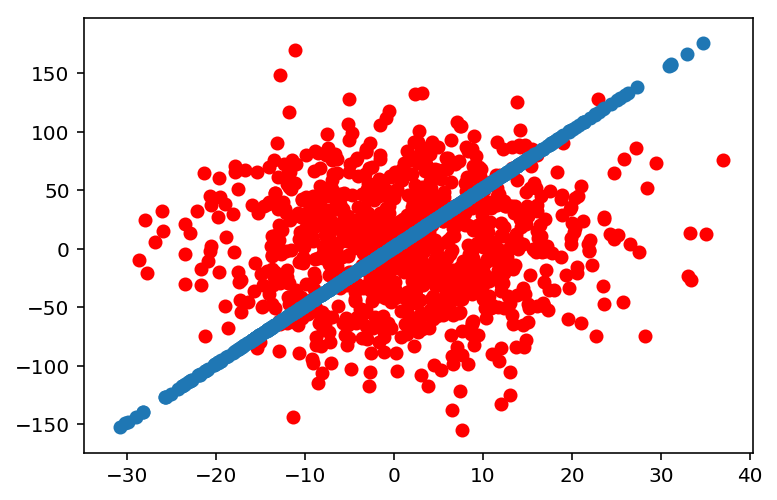

In [5]:
plt.scatter(x,y, color = "red")
plt.scatter(x_prime, y_prime)

c) perform linear regression to generate $\hat{y}$ an approximation of $y$ from $(y',x)$. show a scatter plot of $y'$ against a plot of $y$, and $\hat{y}$

--

the code snippets ahead assumes x and y are flat numpy arrays.
a flat array is not a row or a column vector. conversion is performed by indexing with an "empty new axis".
run the following cell to see this.

In [6]:
import numpy as np
a = np.array([1, 2, 3])
a_row_v = a[np.newaxis, :]
a_col_v = a[:, np.newaxis]
print(a.shape)
print(a_row_v.shape)
print(a_col_v.shape)

(3,)
(1, 3)
(3, 1)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [8]:
# create regression pipeline ( PolynomialFeatures is used to add a column of ones for the intercept)
regr = make_pipeline(PolynomialFeatures(1), LinearRegression())

# transform x from a flat array to a column vector
X = x[:, np.newaxis]

# fit linear model
regr.fit(X, y_prime)

# get coefficients
intercept = regr.named_steps['linearregression'].intercept_
coef = regr.named_steps['linearregression'].coef_
print coef, intercept
# get prediction
y_hat = regr.predict(X)

[ 0.  5.] -8.97913108554


d) compute the $r^2$ score and the square residual sum (RSS)

In [9]:
from sklearn.metrics import r2_score

In [10]:
print "r2_score:", r2_score(y_hat, X)

r2_score: 0.355041239706


# Question 2
repeat for additive gaussian noise with $\sigma^2=2, 5, 10, 20 $. Are the estimated intercept and coefficient close to the true values? if not, why?

- the lower the variance is the more the intercept is closer to the true values, the coefficients are the same

In [11]:
for var in [2, 5, 10 , 20]:
    x = np.random.normal(1,10, 1000)

    
    x_prime = noise_gen(x, var)
    y_prime = 5*(x_prime) + 2
    
    # create regression pipeline ( PolynomialFeatures is used to add a column of ones for the intercept)
    regr = make_pipeline(PolynomialFeatures(1), LinearRegression())
    
    # transform x from a flat array to a column vector
    X = x[:, np.newaxis]
    
    # fit linear model
    regr.fit(X, y_prime)
    
    # get coefficients
    intercept = regr.named_steps['linearregression'].intercept_
    coef = regr.named_steps['linearregression'].coef_
    print coef, intercept
    # get prediction
    y_hat = regr.predict(X)
def noise_gen(data, var):
    return data + np.random.normal(0,var)


x_prime = noise_gen(x, var = 1)
y_prime = 5*(x_prime) + 2

[ 0.  5.] 1.33945645081
[ 0.  5.] 26.5330473759
[ 0.  5.] 29.1306474414
[ 0.  5.] -216.694110093


# Question 3
a) Load the data in lin_reg_data.csv to a pandas data frame, and perform a linear regression for the x column Vs. the y column. Print the intercept and coefficient. 

In [12]:
import pandas as pd
lin_df = pd.read_csv("./lin_reg.csv")

In [13]:
lin_df.head()

x          y
0 -4.999396  25.396846
1 -4.998849  26.102965
2 -4.998668  25.445523
3 -4.998363  26.184394
4 -4.998343  28.572032

In [14]:
regr = make_pipeline(PolynomialFeatures(1), LinearRegression())

# transform x from a flat array to a column vector
X = lin_df.x[:, np.newaxis]

# fit linear model
regr.fit(X, lin_df.y)

# get coefficients
intercept = regr.named_steps['linearregression'].intercept_
coef = regr.named_steps['linearregression'].coef_
print coef, intercept
# get prediction
y_hat = regr.predict(X)

[ 0.          0.57257405] 15.9778322955


b) Repeat for the first 90% of the rows. Are the results similar? 

In [15]:
lin_df = lin_df[0:45000]
regr = make_pipeline(PolynomialFeatures(1), LinearRegression())

# transform x from a flat array to a column vector
X = lin_df.x[:, np.newaxis]

# fit linear model
regr.fit(X, lin_df.y)

# get coefficients
intercept = regr.named_steps['linearregression'].intercept_
coef = regr.named_steps['linearregression'].coef_
print coef, intercept
# get prediction
y_hat = regr.predict(X)

[ 0.         -3.00608838] 10.0226927846


- The intercept reduced by 5  and the coefficient decreased by -3

c) Perform a regression for the first 90% of the points for x and y you generated in Q1. Are the results there similar to those of the regression performed on all points?

In [16]:
x = np.random.normal(1,10, 1000)[0:900]

x_prime = noise_gen(x, var = 1)
y_prime = 5*(x_prime) + 2

regr = make_pipeline(PolynomialFeatures(1), LinearRegression())

# transform x from a flat array to a column vector
X = x[:, np.newaxis]

# fit linear model
regr.fit(X, y_prime)

# get coefficients
intercept = regr.named_steps['linearregression'].intercept_
coef = regr.named_steps['linearregression'].coef_
print coef, intercept
# get prediction
y_hat = regr.predict(X)

[ 0.  5.] 2.92609957397


- intercept increased from -5 to 2

d) Plot the residuals for the regression performed on the all rows of the data frame

In [17]:
lin_df = pd.read_csv("./lin_reg.csv")

regr = make_pipeline(PolynomialFeatures(1), LinearRegression())

# transform x from a flat array to a column vector
X = lin_df.x[:, np.newaxis]

# fit linear model
regr.fit(X, lin_df.y)

# get coefficients
intercept = regr.named_steps['linearregression'].intercept_
coef = regr.named_steps['linearregression'].coef_
print coef, intercept
# get prediction
y_hat = regr.predict(X)


[ 0.          0.57257405] 15.9778322955


In [18]:
resid = lin_df.y - y_hat

lin_df["resid"] = resid

In [ ]:
plt.scatter(lin_df.x,lin_df.resid)

e) plot a scatter plot of the x and y columns, can you explain this phenomenon?

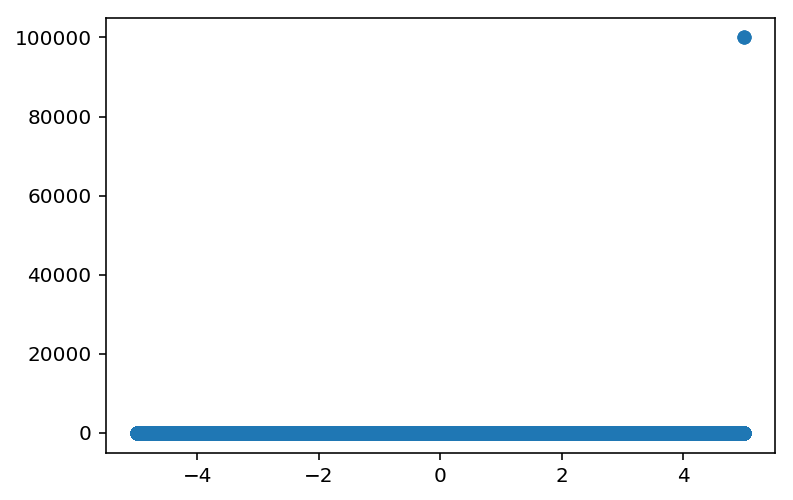

In [20]:
plt.scatter(lin_df.x, lin_df.y) # an outlier